## House prediction model using Linear regression and KNN

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
data = pd.DataFrame(boston.data)

**Data preprocessing**

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df1 = pd.read_csv("HousingData.csv")

In [ ]:
boston['MEDV'] = boston.target

In [ ]:
data.nunique()

0     504
1      26
2      76
3       2
4      81
5     446
6     356
7     412
8       9
9      66
10     46
11    357
12    455
dtype: int64

In [ ]:
df1.info()
df2=df1.dropna()
df2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
data[data.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
corr = data.corr()
corr.shape

(13, 13)

**Visualise some of the attributes of the dataset.**

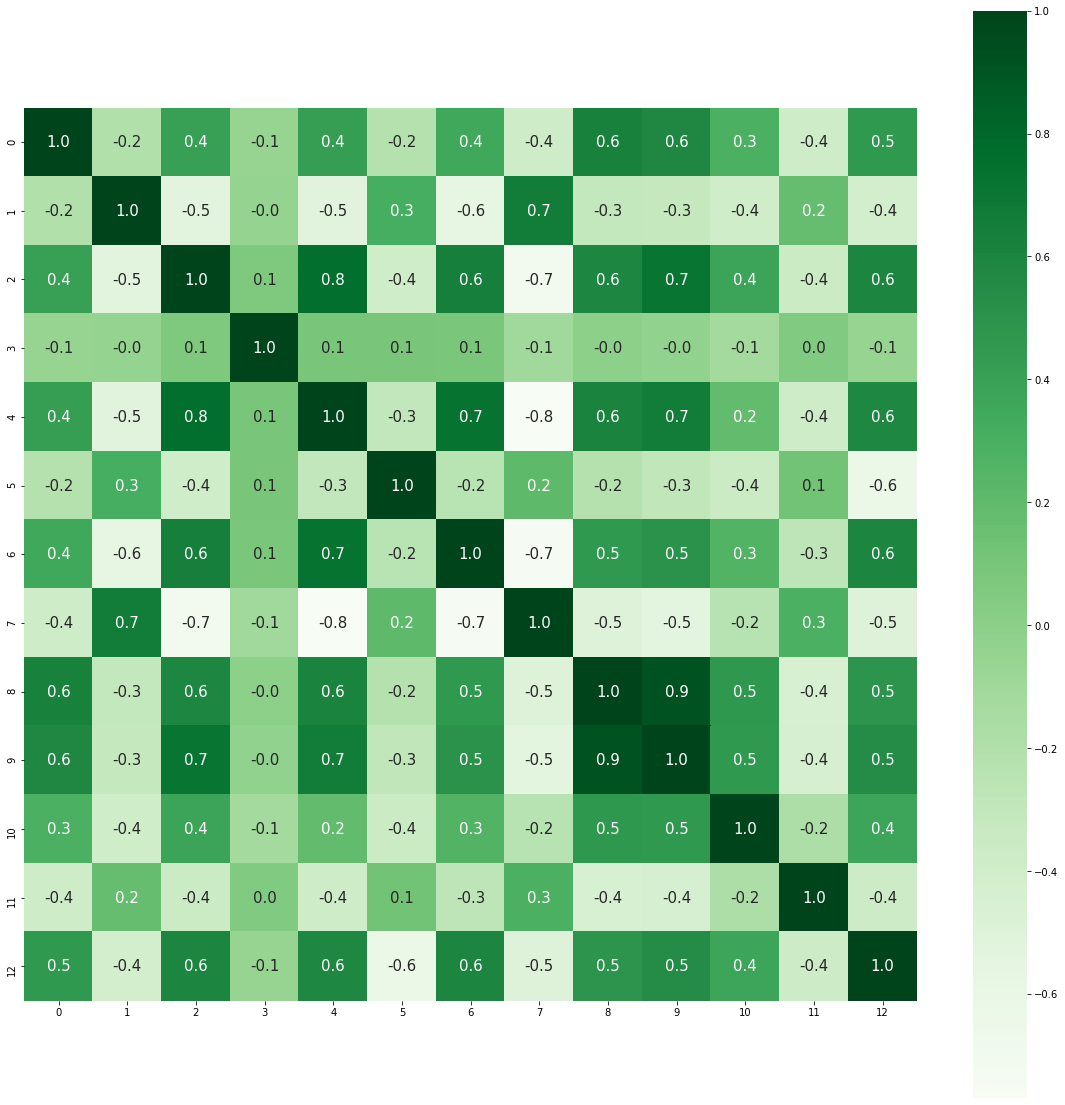

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
#The correlation coefficient ranges from -1 to 1. 
#If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

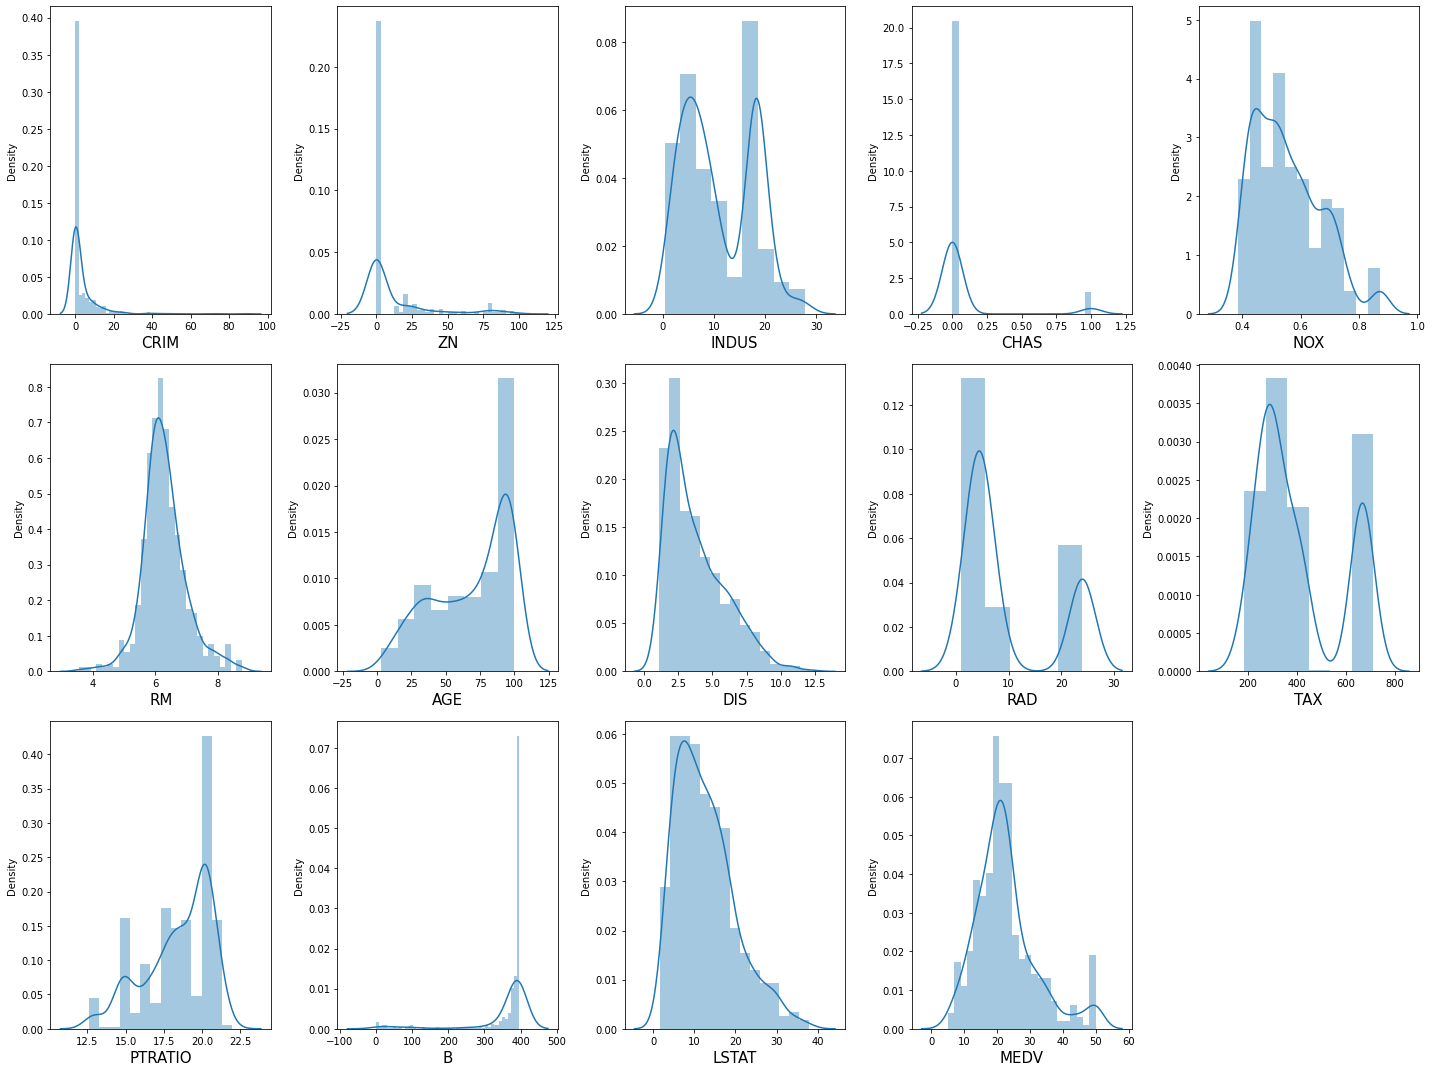

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df1:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


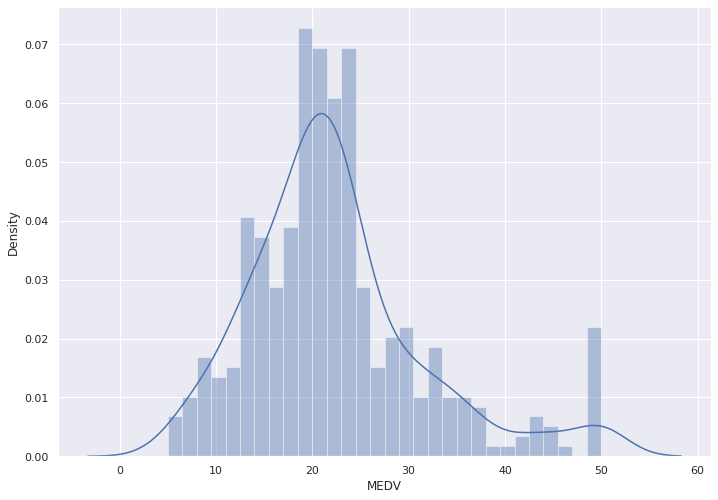

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df2['MEDV'], bins=30)
plt.show()

In [ ]:
data['PRICE'] = boston.target

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# HousingData.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('HousingData.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'HousingData.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 506 rows and 14 columns


In [ ]:
sns.set_style('whitegrid')
# sns.countplot(x='rad',

# Observations



*   We can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
*   An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.


*   The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
*   The prices tend to decrease with an increase in LSTAT. It doesn’t look to be following exactly a linear line.

In [ ]:
data['PRICE'] = boston.target

**Split your whole dataset between training and testing dataset**

In [ ]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

**Predict the price using the following algorithms:**

**a) Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

36.35704137659508

In [ ]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,0.0,-0.122570
1,1.0,0.055678
2,2.0,-0.008834
3,3.0,4.693448
4,4.0,-14.435783
5,5.0,3.280080
6,6.0,-0.003448
7,7.0,-1.552144
8,8.0,0.326250
9,9.0,-0.014067


In [ ]:
y_pred = lm.predict(X_train)

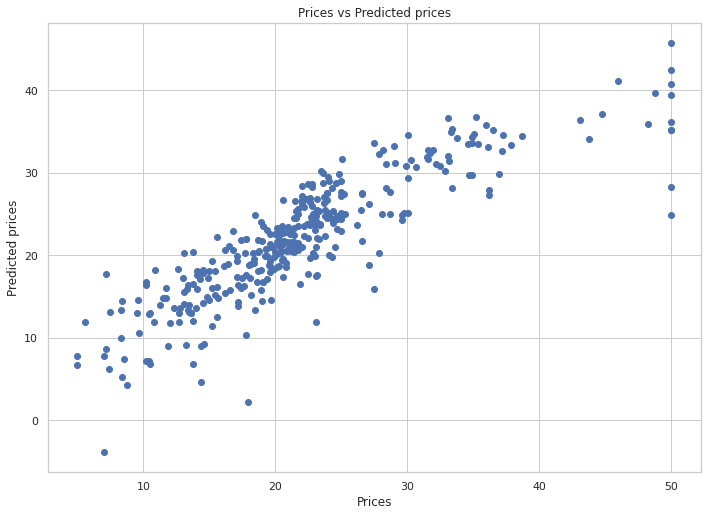

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

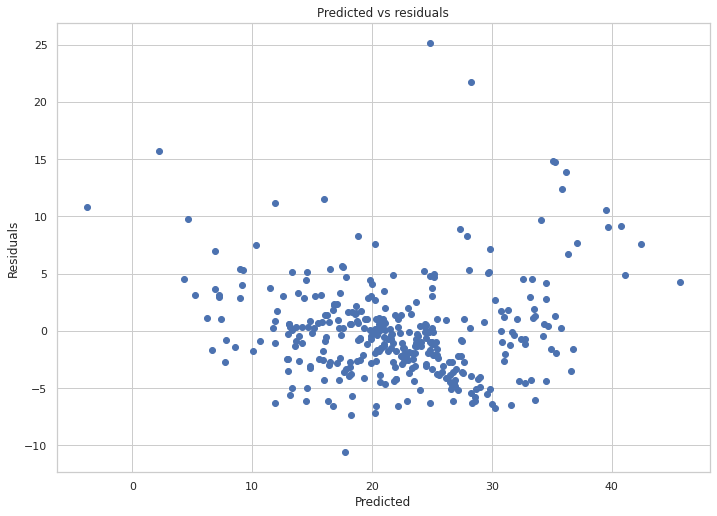

In [ ]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


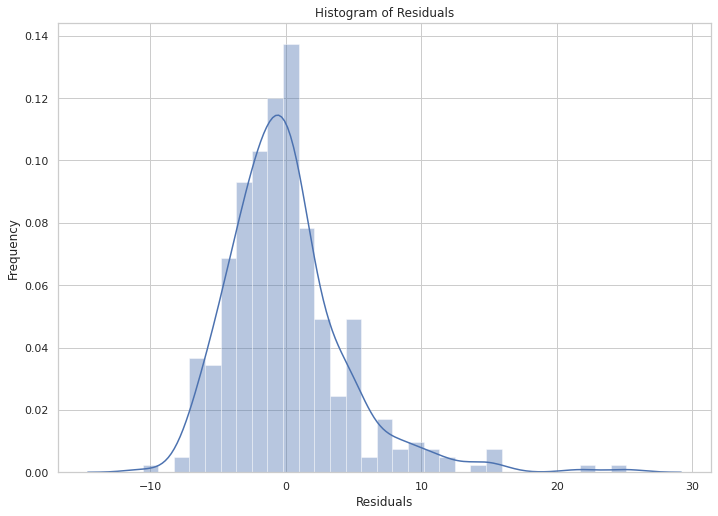

In [ ]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
TargetVariable='MEDV'
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS']

In [ ]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

In [ ]:
print(RegModel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

In [ ]:
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

R2 Value: 0.7465991966746854


In [ ]:
print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())


##### Model Validation and Accuracy Calculations ##########
     RM  PTRATIO  LSTAT  RAD  CHAS  MEDV  PredictedMEDV
8   NaN      NaN    NaN  NaN   NaN  16.5           11.0
289 NaN      NaN    NaN  NaN   NaN  24.8           26.0
68  NaN      NaN    NaN  NaN   NaN  17.4           17.0
211 NaN      NaN    NaN  NaN   NaN  19.3           19.0
226 NaN      NaN    NaN  NaN   NaN  37.6           36.0


In [ ]:
TestingDataResults['APE']=100 * ((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 81.94746256093435
Median Accuracy on test data: 87.31452455590386


>  Print your model's accuracy on training and testing datasets.

In [ ]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.02149641 87.96196673 83.50110089 85.73940757 85.75804655 88.30464413
 87.47721274 35.75282376 58.26115477 85.26073338]

Final Average Accuracy of the model: 78.7


**b) KNN**

>  # Print your model's accuracy on training and testing datasets.



In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'MEDV'])


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

print(RegModel)

KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
R2 Value: 0.7531521070882238

##### Model Validation and Accuracy Calculations ##########
     RM  PTRATIO  LSTAT  RAD  CHAS  MEDV  PredictedMEDV
8   NaN      NaN    NaN  NaN   NaN  16.5           20.0
289 NaN      NaN    NaN  NaN   NaN  24.8           22.0
68  NaN      NaN    NaN  NaN   NaN  17.4           22.0
211 NaN      NaN    NaN  NaN   NaN  19.3           24.0
226 NaN      NaN    NaN  NaN   NaN  37.6           31.0
Mean Accuracy on test data: 78.93666353044719
Median Accuracy on test data: 84.81729284611424

Accuracy values for 10-fold Cross Validation:
 [60.85835437 74.94963213 17.68313058 72.43011501 79.30479201 74.80120156
 75.70997961 53.77474171 64.27067387 78.52796715]

Final Average Accuracy of the model: 65.23


In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.0898610949711305
MSE: 19.073688703469035
RMSE: 4.367343437774162
